<a href="https://colab.research.google.com/github/smlra-kjsce/numpy-pandas-vis-2021/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

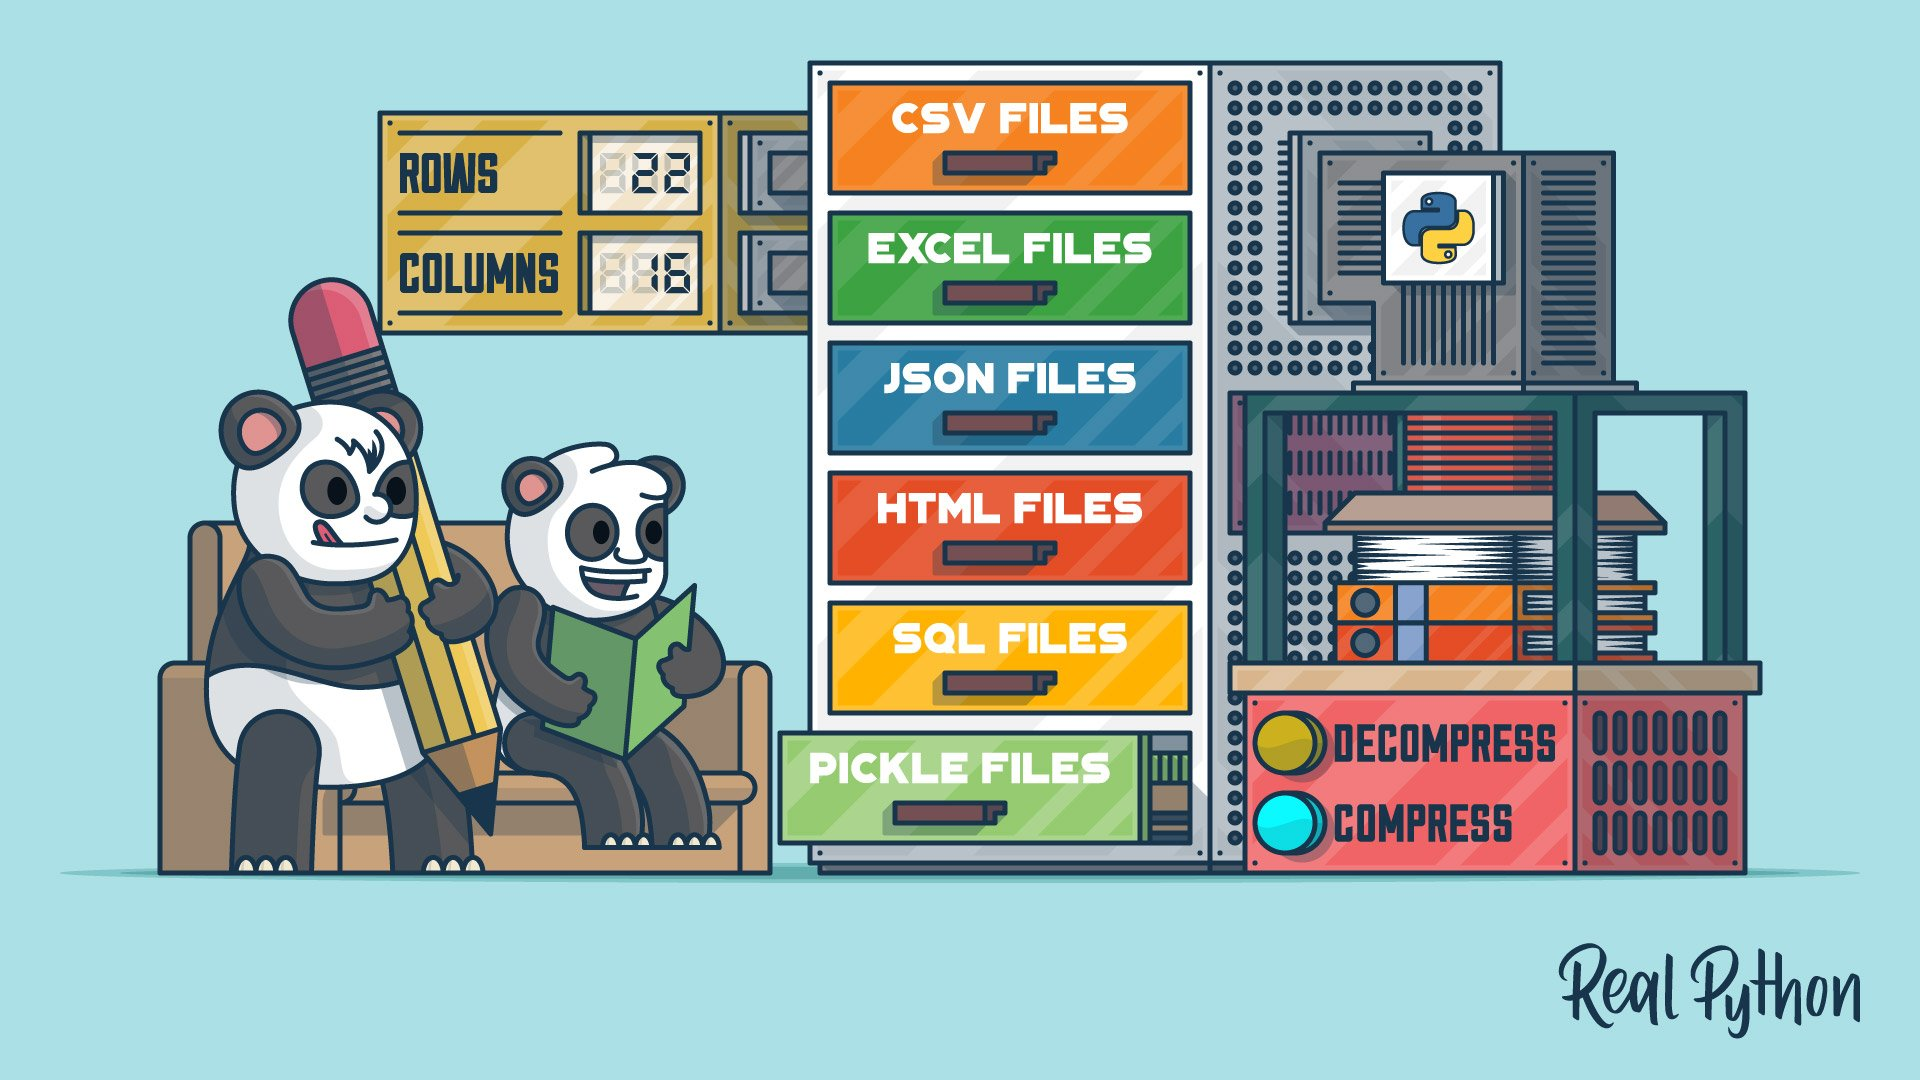

# ***`Handling Missing Values in Pandas`***

What is missing data?<br/>
Missing data in a data set is one of the problems that hinders the process of processing data. 
Missing data is written as <br/>
1) None: None is a Python singleton object that is often used for missing data in Python code.<br/>
2) NaN : NaN (an acronym for Not a Number)<br/>


In [ ]:
import pandas as pd
import numpy as np
# np.arrange will arrange values from 93,95(excluding 96)
df = pd.DataFrame([np.arange(93,96)],index=['Maths','Science','English'], 
columns=["Student1","Student2","Student3"]) 
print(df)

         Student1  Student2  Student3
Maths          93        94        95
Science        93        94        95
English        93        94        95


In [ ]:
df=df.reindex(index=['Maths','Science','English','data_science'])
print(df)

              Student1  Student2  Student3
Maths             93.0      94.0      95.0
Science           93.0      94.0      95.0
English           93.0      94.0      95.0
data_science       NaN       NaN       NaN


**`1) isna(df): used to find missing values`**

In [ ]:
pd.isna(df)

,Student1,Student2,Student3
Maths,False,False,False
Science,False,False,False
English,False,False,False
data_science,True,True,True


**`2) notna(df): opposite of isna`**

In [ ]:
pd.notna(df)

,Student1,Student2,Student3
Maths,True,True,True
Science,True,True,True
English,True,True,True
data_science,False,False,False


In [ ]:
df1=df.dropna()
print(df1)

         Student1  Student2  Student3
Maths        93.0      94.0      95.0
Science      93.0      94.0      95.0
English      93.0      94.0      95.0


# ***`Filling out missing data`***




***`1) Fillna`***

In [ ]:
df1=df.fillna(91)
print(df1)

              Student1  Student2  Student3
Maths             93.0      94.0      95.0
Science           93.0      94.0      95.0
English           93.0      94.0      95.0
data_science      91.0      91.0      91.0


In [ ]:
df1=df.fillna(method='ffill') 
# we can use methods such as forward fill
print(df1)

              Student1  Student2  Student3
Maths             93.0      94.0      95.0
Science           93.0      94.0      95.0
English           93.0      94.0      95.0
data_science      93.0      94.0      95.0


In [ ]:
df1=df.interpolate()
print(df1)

              Student1  Student2  Student3
Maths             93.0      94.0      95.0
Science           93.0      94.0      95.0
English           93.0      94.0      95.0
data_science      93.0      94.0      95.0


In [ ]:

import pandas as pd
import numpy as np
arr=np.array([1,2,3])
idx=np.array([pd.Timestamp('20211225'),
pd.Timestamp('20211227'),
pd.Timestamp('20211229')])
df = pd.DataFrame(arr,index=idx)
idx=[pd.Timestamp('20211225'),
pd.Timestamp('20211226'),
pd.Timestamp('20211227'),
pd.Timestamp('20211228'),
pd.Timestamp('20211229')]
df=df.reindex(index=idx)
print(df)

              0
2021-12-25  1.0
2021-12-26  NaN
2021-12-27  2.0
2021-12-28  NaN
2021-12-29  3.0


In [ ]:
df=df.interpolate()

In [ ]:
print(df)

              0
2021-12-25  1.0
2021-12-26  1.5
2021-12-27  2.0
2021-12-28  2.5
2021-12-29  3.0


# ***`Analysing correlation between variables`***

Analysing Correlation means finding how a variable depends on the other <br/>
Positive Correlation: both variables change in the same direction.<br/>
Neutral Correlation: No relationship in the change of the variables.<br/>
Negative Correlation: variables change in opposite directions.<br/>



In [ ]:
movies = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")

In [ ]:
correlations = movies.corr()

In [ ]:
# movies.drop("Type", inplace=True, axis=1)

In [ ]:
movies.corr()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Runtime
Unnamed: 0,1.000000,1.000000,-0.334904,-0.844152,-0.086986,0.541981,0.500118,-0.249625
ID,1.000000,1.000000,-0.334904,-0.844152,-0.086986,0.541981,0.500118,-0.249625
Year,-0.334904,-0.334904,1.000000,0.306645,0.080422,-0.243679,-0.177892,0.123096
Netflix,-0.844152,-0.844152,0.306645,1.000000,-0.253300,-0.647814,-0.256625,0.115101
Hulu,-0.086986,-0.086986,0.080422,-0.253300,1.000000,-0.239705,-0.108368,0.037435
Prime Video,0.541981,0.541981,-0.243679,-0.647814,-0.239705,1.000000,-0.276499,0.000752
Disney+,0.500118,0.500118,-0.177892,-0.256625,-0.108368,-0.276499,1.000000,-0.212044
Runtime,-0.249625,-0.249625,0.123096,0.115101,0.037435,0.000752,-0.212044,1.000000


In [ ]:
print(correlations["Year"])

Unnamed: 0    -0.334904
ID            -0.334904
Year           1.000000
Netflix        0.306645
Hulu           0.080422
Prime Video   -0.243679
Disney+       -0.177892
Runtime        0.123096
Name: Year, dtype: float64


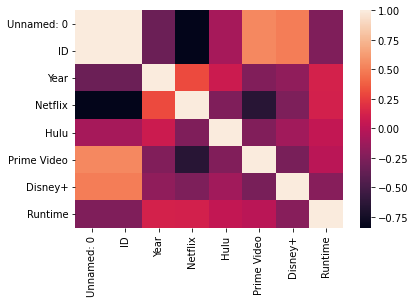

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

In [ ]:

#Create a Dictionary of series
d = {'Name':pd.Series(['Michael Scott','Jim Halpert','Pam Beesly','Sheldon Cooper','Amy Fowler','Ross Geller','Chandler Bing',
   'Rachel Greene','Jake Peralta','Amy Santiago','Rosa Diaz','Holt']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

#Create a DataFrame
df = pd.DataFrame(d)
print(df)

              Name  Age  Rating
0    Michael Scott   25    4.23
1      Jim Halpert   26    3.24
2       Pam Beesly   25    3.98
3   Sheldon Cooper   23    2.56
4       Amy Fowler   30    3.20
5      Ross Geller   29    4.60
6    Chandler Bing   23    3.80
7    Rachel Greene   34    3.78
8     Jake Peralta   40    2.98
9     Amy Santiago   30    4.80
10       Rosa Diaz   51    4.10
11            Holt   46    3.65


sum()
Returns the sum of the values for the requested axis. By default, axis is index (axis=0).

In [ ]:
print (df.sum())

Name      Michael ScottJim HalpertPam BeeslySheldon Coop...
Age                                                     382
Rating                                                44.92
dtype: object


mean()
Returns the average value

In [ ]:
print(df.mean())

Age       31.833333
Rating     3.743333
dtype: float64


std()
Returns the standard deviation of the numerical columns.

In [ ]:
print(df.std())

Age       9.232682
Rating    0.661628
dtype: float64


The describe() function computes a summary of statistics pertaining to the DataFrame columns.

In [ ]:
print (df.describe())

             Age     Rating
count  12.000000  12.000000
mean   31.833333   3.743333
std     9.232682   0.661628
min    23.000000   2.560000
25%    25.000000   3.230000
50%    29.500000   3.790000
75%    35.500000   4.132500
max    51.000000   4.800000


loc: we can extract a particular row or group of rows using loc


In [ ]:
df.loc[2]

Name      Pam Beesly
Age               25
Rating          3.98
Name: 2, dtype: object

In [ ]:
df.loc[2:5]

,Name,Age,Rating
2,Pam Beesly,25,3.98
3,Sheldon Cooper,23,2.56
4,Amy Fowler,30,3.20
5,Ross Geller,29,4.60


# ***`Working with text data`***

	
lower()

Converts strings in the Series/Index to lower case.


upper()

Converts strings in the Series/Index to upper case.


len()

Computes String length().


strip()

Helps strip whitespace(including newline) from each string in the Series/index from both the sides.


split(' ')

Splits each string with the given pattern.


cat(sep=' ')

Concatenates the series/index elements with given separator.


get_dummies()

Returns the DataFrame with One-Hot Encoded values.


contains(pattern)

Returns a Boolean value True for each element if the substring contains in the element, else False.


replace(a,b)

Replaces the value a with the value b.


repeat(value)

Repeats each element with specified number of times.

	
count(pattern)

Returns count of appearance of pattern in each element.


startswith(pattern)

Returns true if the element in the Series/Index starts with the pattern.


endswith(pattern)

Returns true if the element in the Series/Index ends with the pattern.


find(pattern)

Returns the first position of the first occurrence of the pattern.


findall(pattern)

Returns a list of all occurrence of the pattern.


swapcase

Swaps the case lower/upper.


islower()

Checks whether all characters in each string in the Series/Index in lower case or not. Returns Boolean

	
isupper()

Checks whether all characters in each string in the Series/Index in upper case or not. Returns Boolean.


isnumeric()

Checks whether all characters in each string in the Series/Index are numeric. Returns Boolean.

In [ ]:
s=df["Name"]

In [ ]:
print (s.str.get_dummies())

    Amy Fowler  Amy Santiago  ...  Ross Geller  Sheldon Cooper
0            0             0  ...            0               0
1            0             0  ...            0               0
2            0             0  ...            0               0
3            0             0  ...            0               1
4            1             0  ...            0               0
5            0             0  ...            1               0
6            0             0  ...            0               0
7            0             0  ...            0               0
8            0             0  ...            0               0
9            0             1  ...            0               0
10           0             0  ...            0               0
11           0             0  ...            0               0

[12 rows x 12 columns]


In [ ]:
print (s.str.replace('Rachel Greene','Monica Geller'))

0      Michael Scott
1        Jim Halpert
2         Pam Beesly
3     Sheldon Cooper
4         Amy Fowler
5        Ross Geller
6      Chandler Bing
7      Monica Geller
8       Jake Peralta
9       Amy Santiago
10         Rosa Diaz
11              Holt
Name: Name, dtype: object


In [ ]:
print (s.str. startswith ('Mich'))

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: Name, dtype: bool
